# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API Docs ask for unit specification. Specifying imperial.
units = "imperial"

# API Request URL - open '&q=' at end of URL for adding city name at end of URL for future looping
req_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="


# Declare Variables
city_name = []
city_lat = []
city_lng = []
city_temp = []
city_max_temp = []
city_humidity = []
city_cloudy = []
city_winds = []
city_country = []
city_date = []
request = 1
query_set = 1

# print initial header before displaying for loop  data
print("Beginning Data Retrieval")
print("----------------------------")

# --- for loop go through the list of cities and perform a request for data on each city ---
for city in cities:
    
    # Attach city array contents to req_url
    query_url = req_url + city
    
    # Store requested data in local json variable to limit API calls
    data = requests.get(query_url).json()
    
    # Gather and store data in arrays
    try:
        print(f"Processing Record {request} of Set {query_set} | {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lat.append(data["coord"]["lat"])
        city_lng.append(data["coord"]["lon"])    
        city_temp.append(data["main"]["temp"])
        city_max_temp.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudy.append(data["clouds"]["all"])
        city_winds.append(data["wind"]["speed"])
        city_date.append(data["dt"])
        
        # Add one for every 'try'
        request += 1
        
        # If statement to split API call into 'sets'
        if request > 50:
            
            # Prepare for next API call, split into 'sets' of calls.
            query_set += 1
            
            # Reset variables for next iteration
            request = 1
            
            # Sleep to add delay limitation for API calls
            request.sleep(1)
    
    except:
        print(f"City '{city}' not found. Skipping...")

# Print showing data is done being gathered
print("!---------------------------!")
print("Data Retrieval Complete")
print("!--------------------------!")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | victor harbor
Processing Record 2 of Set 1 | nouadhibou
Processing Record 3 of Set 1 | yulara
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | milkovo
Processing Record 14 of Set 1 | nurobod
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | saint-pierre
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | lavrentiya
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | isangel
Processing Record 22 of Set 1 | coahuayana
Processing Record 23 of Set 1 | atuona
Proces

Processing Record 21 of Set 4 | hualmay
Processing Record 22 of Set 4 | vitim
Processing Record 23 of Set 4 | nioro
Processing Record 24 of Set 4 | batagay-alyta
Processing Record 25 of Set 4 | mokobeng
Processing Record 26 of Set 4 | nanortalik
Processing Record 27 of Set 4 | kaitangata
Processing Record 28 of Set 4 | juneau
Processing Record 29 of Set 4 | buraydah
Processing Record 30 of Set 4 | viligili
City 'viligili' not found. Skipping...
Processing Record 30 of Set 4 | sao filipe
Processing Record 31 of Set 4 | half moon bay
Processing Record 32 of Set 4 | binzhou
Processing Record 33 of Set 4 | matay
Processing Record 34 of Set 4 | severo-kurilsk
Processing Record 35 of Set 4 | tautira
Processing Record 36 of Set 4 | spornoye
Processing Record 37 of Set 4 | abaete
Processing Record 38 of Set 4 | saskylakh
Processing Record 39 of Set 4 | tiksi
Processing Record 40 of Set 4 | sobolevo
Processing Record 41 of Set 4 | copala
Processing Record 42 of Set 4 | luderitz
Processing Recor

Processing Record 41 of Set 7 | palabuhanratu
City 'palabuhanratu' not found. Skipping...
Processing Record 41 of Set 7 | tarudant
City 'tarudant' not found. Skipping...
Processing Record 41 of Set 7 | umzimvubu
City 'umzimvubu' not found. Skipping...
Processing Record 41 of Set 7 | oriximina
Processing Record 42 of Set 7 | brae
Processing Record 43 of Set 7 | namatanai
Processing Record 44 of Set 7 | havre-saint-pierre
Processing Record 45 of Set 7 | nhulunbuy
Processing Record 46 of Set 7 | zhaodong
Processing Record 47 of Set 7 | dali
Processing Record 48 of Set 7 | esfahan
Processing Record 49 of Set 7 | agadez
Processing Record 50 of Set 7 | rafaela
City 'rafaela' not found. Skipping...
Processing Record 1 of Set 8 | mao
Processing Record 2 of Set 8 | naliya
Processing Record 3 of Set 8 | portland
Processing Record 4 of Set 8 | baruun-urt
Processing Record 5 of Set 8 | smidovich
Processing Record 6 of Set 8 | goudomp
City 'goudomp' not found. Skipping...
Processing Record 6 of Set

Processing Record 3 of Set 11 | fairbanks
Processing Record 4 of Set 11 | risor
Processing Record 5 of Set 11 | karaul
City 'karaul' not found. Skipping...
Processing Record 5 of Set 11 | kushiro
Processing Record 6 of Set 11 | akureyri
Processing Record 7 of Set 11 | cartagena
Processing Record 8 of Set 11 | damietta
Processing Record 9 of Set 11 | kristianstad
Processing Record 10 of Set 11 | snezhnogorsk
Processing Record 11 of Set 11 | pathein
Processing Record 12 of Set 11 | trairi
Processing Record 13 of Set 11 | tezu
Processing Record 14 of Set 11 | afikpo
Processing Record 15 of Set 11 | montlucon
Processing Record 16 of Set 11 | porto novo
Processing Record 17 of Set 11 | nhamunda
Processing Record 18 of Set 11 | nizhniy tagil-39
City 'nizhniy tagil-39' not found. Skipping...
Processing Record 18 of Set 11 | olot
Processing Record 19 of Set 11 | tigre
Processing Record 20 of Set 11 | asmara
Processing Record 21 of Set 11 | atar
Processing Record 22 of Set 11 | pochutla
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Create Dataframe for retrieved data
city_df = pd.DataFrame({"City": city_name,
                                "Country": city_country,
                                "Date": city_date,
                                "Lat": city_lat,
                                "Lng": city_lng,
                                "Max Temp (F)": city_max_temp,
                                "Humidity (%)": city_humidity,
                                "Cloudiness (%)": city_cloudy,
                                "Wind Speed (mph)": city_winds,
                                })

# Convert unix numbers in date column to readable datetime
city_df["Date"] = pd.to_datetime(city_df["Date"], unit = "s")

# Export retrieved data 
city_df.to_csv("cities.csv", index=True, index_label="City ID", header=True)

city_df

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Victor Harbor,AU,2021-08-07 17:41:23,-35.5667,138.6167,51.91,81,46,5.10
1,Nouadhibou,MR,2021-08-07 17:50:42,20.9310,-17.0347,70.29,88,1,11.72
2,Yulara,AU,2021-08-07 17:40:44,-25.2406,130.9889,49.84,43,0,6.91
3,Torbay,CA,2021-08-07 17:41:09,47.6666,-52.7314,78.89,73,75,31.07
4,Rikitea,PF,2021-08-07 17:40:45,-23.1203,-134.9692,73.98,80,5,11.52
...,...,...,...,...,...,...,...,...,...
550,Bredy,RU,2021-08-07 17:54:23,52.4153,60.3411,61.23,48,53,8.55
551,Bela Cruz,BR,2021-08-07 17:54:23,-3.0506,-40.1678,97.03,27,24,12.66
552,Asaba,NG,2021-08-07 17:54:24,6.2006,6.7338,73.44,95,100,5.23
553,Lingao,CN,2021-08-07 17:54:24,19.9103,109.6859,83.43,76,100,4.85


In [9]:
city_df.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,20.609646,18.117462,70.752306,69.544144,58.286486,7.842919
std,32.821105,90.705502,15.031372,22.184152,37.448483,5.518886
min,-54.800000,-175.200000,29.860000,7.000000,0.000000,0.000000
25%,-3.549350,-60.139850,59.575000,59.000000,20.000000,3.940000
50%,21.502800,20.040300,73.440000,75.000000,71.000000,6.580000
75%,49.812950,100.259350,81.715000,85.500000,94.000000,10.605000
max,78.218600,179.316700,104.900000,100.000000,100.000000,33.380000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
humidity_over_max = city_df.loc[city_df["Humidity (%)"] > 100, :]

if humidity_over_max.empty == True:
    print("There are no cities with humidity values over 100%")
    print("Skipping forward...")
    
    # Extract relevant fields
    latitudes = city_df["Lat"]
    temperatures = city_df["Max Temp (F)"]
    humidity = city_df["Humidity (%)"]
    cloudiness = city_df["Cloudiness (%)"]
    windspeed = city_df["Wind Speed (mph)"]
    
else:
    # Grab overly humid locations
    humidity_index = humidity_over_max.index
    
    # Store in new dataframe
    removed_overhumid_city_df = city_df.drop(humidity_index).reset_index(drop=True)
    
    # Extract relevant fields
    latitudes = clean_city_df["Lat"]
    temperatures = clean_city_df["Max Temp (F)"]
    humidity = clean_city_df["Humidity (%)"]
    cloudiness = clean_city_df["Cloudiness (%)"]
    windspeed = clean_city_df["Wind Speed (mph)"]

There are no cities with humidity values over 100%
Skipping forward...


In [21]:
#  Get the indices of cities that have humidity over 100%.
# SKIPPED BECAUSE THERE ARE NO CITIES OVER 100% HUMIDITY, SEE ABOVE IF STATEMENT

In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# DONE ABOVE WITH IF STATEMENT

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

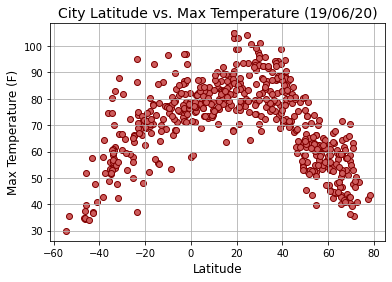

In [32]:
plt.scatter(latitudes, temperatures, marker="o", facecolors="indianred", edgecolors="maroon")

plt.title("City Latitude vs. Max Temperature (19/06/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

plt.savefig("../Images/latitude-vs-temp.png")
plt.show()

## Latitude vs. Humidity Plot

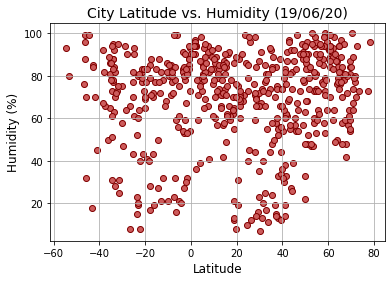

In [34]:
plt.scatter(latitudes, humidity, marker="o", facecolors="indianred", edgecolors="maroon")

plt.title("City Latitude vs. Humidity (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

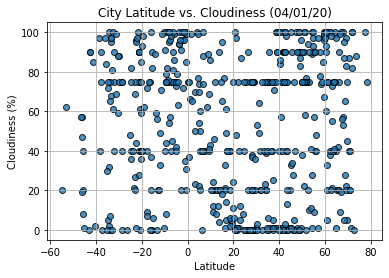

## Latitude vs. Wind Speed Plot

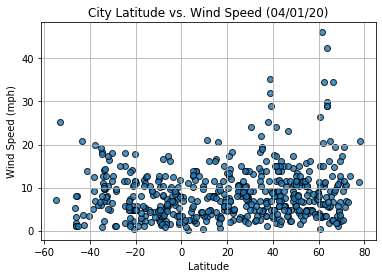

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


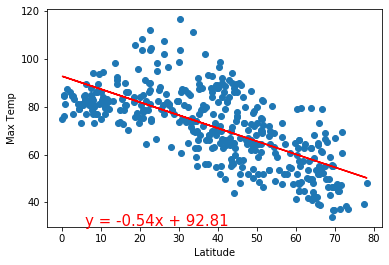

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


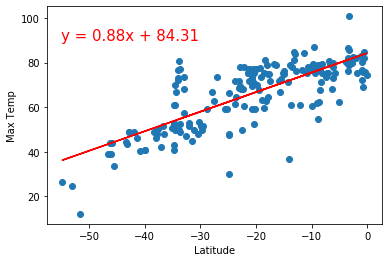

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


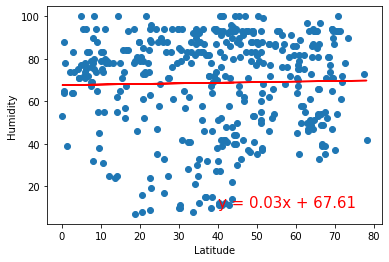

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


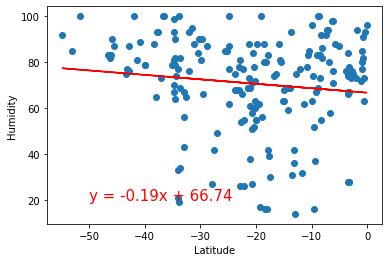

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


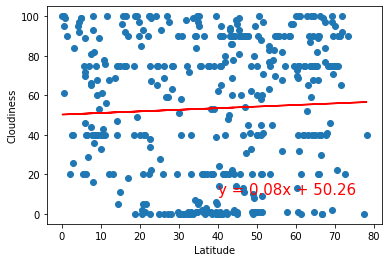

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


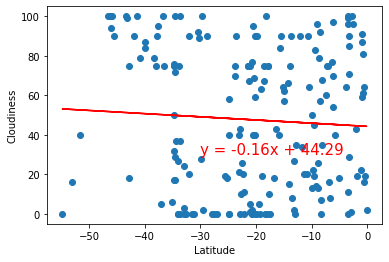

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


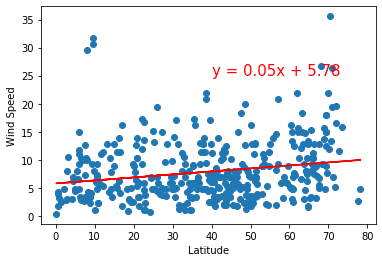

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


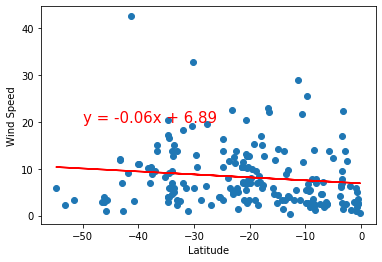